## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Create a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**QUESTION:** Load dataset and display some lines of the csv file.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ai4i2020.csv")

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
def add_text_to_bar_chart(text_list, bar):
    i =0
    for bar in chart:
      plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+1, text_list[i], horizontalalignment="center")
      i +=1

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.

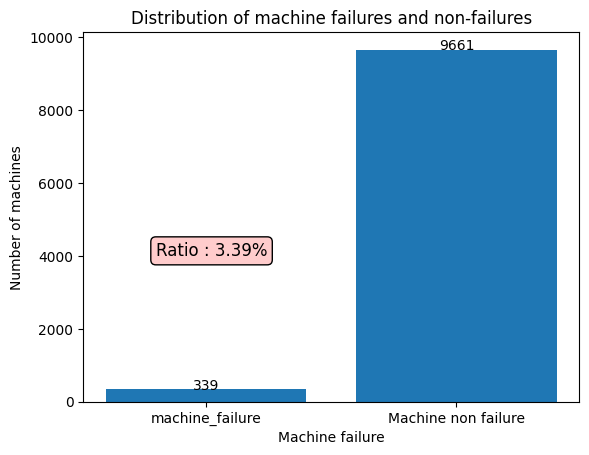

In [5]:
machine_non_failure = data[data['Machine failure'] == 0]
machine_failure = data[data['Machine failure'] == 1]

chart = plt.bar(["machine_failure", "Machine non failure"], [len(machine_failure),len(machine_non_failure)], width=0.8)
plt.title("Distribution of machine failures and non-failures")
plt.xlabel("Machine failure")
plt.ylabel("Number of machines")
plt.text(-0.2, 4000, "Ratio : " + str(round(100*len(machine_failure)/(len(machine_non_failure)+len(machine_failure)), 3)) + "%", fontsize=12, bbox=dict(boxstyle="round",ec=(0, 0, 0),fc=(1., 0.8, 0.8)))

add_text_to_bar_chart([len(machine_failure), len(machine_non_failure)], chart)

**ANALYSIS QUESTION:** What do you observe?

"Write here your response"

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

"Write here your response"

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

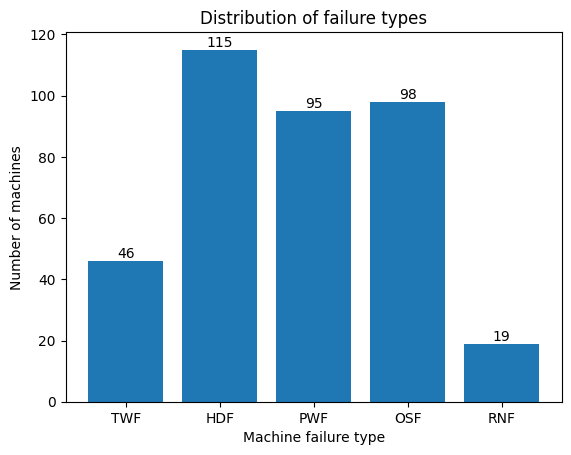

In [6]:
machine_TWF = data[data['TWF'] == 1]
machine_HDF = data[data['HDF'] == 1]
machine_PWF = data[data['PWF'] == 1]
machine_OSF = data[data['OSF'] == 1]
machine_RNF = data[data['RNF'] == 1]

chart = plt.bar(["TWF", "HDF", "PWF", "OSF", "RNF"], [len(machine_TWF),len(machine_HDF), len(machine_PWF), len(machine_OSF), len(machine_RNF)], width=0.8)
plt.title("Distribution of failure types")
plt.xlabel("Machine failure type")
plt.ylabel("Number of machines")

add_text_to_bar_chart([len(machine_TWF),len(machine_HDF), len(machine_PWF), len(machine_OSF), len(machine_RNF)], chart)

**ANALYSIS QUESTION:** What do you observe?

"Write here your response"

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

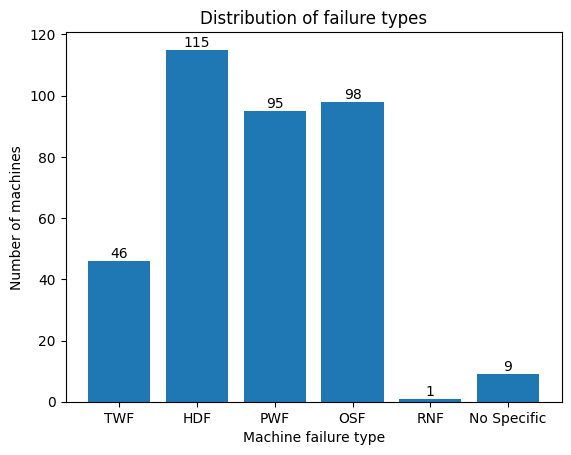

In [7]:
machine_TWF = data[data['Machine failure'] == 1]
machine_TWF = machine_TWF[machine_TWF['TWF'] == 1]
machine_HDF = data[data['Machine failure'] == 1]
machine_HDF = machine_HDF[machine_HDF['HDF'] == 1]
machine_PWF = data[data['Machine failure'] == 1]
machine_PWF = machine_PWF[machine_PWF['PWF'] == 1]
machine_OSF = data[data['Machine failure'] == 1]
machine_OSF = machine_OSF[machine_OSF['OSF'] == 1]
machine_RNF = data[data['Machine failure'] == 1]
machine_RNF = machine_RNF[machine_RNF['RNF'] == 1]

machine_no_specific_failure = data[data['Machine failure'] == 1]
machine_no_specific_failure = machine_no_specific_failure[machine_no_specific_failure['TWF'] == 0]
machine_no_specific_failure = machine_no_specific_failure[machine_no_specific_failure['HDF'] == 0]
machine_no_specific_failure = machine_no_specific_failure[machine_no_specific_failure['PWF'] == 0]
machine_no_specific_failure = machine_no_specific_failure[machine_no_specific_failure['OSF'] == 0]
machine_no_specific_failure = machine_no_specific_failure[machine_no_specific_failure['RNF'] == 0]


chart = plt.bar(["TWF", "HDF", "PWF", "OSF", "RNF", "No Specific"], [len(machine_TWF),len(machine_HDF), len(machine_PWF), len(machine_OSF), len(machine_RNF),len(machine_no_specific_failure)], width=0.8)
plt.title("Distribution of failure types")
plt.xlabel("Machine failure type")
plt.ylabel("Number of machines")

add_text_to_bar_chart([len(machine_TWF),len(machine_HDF), len(machine_PWF), len(machine_OSF), len(machine_RNF), len(machine_no_specific_failure)], chart)

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

"Write your response here"

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [8]:
columns_names = data.columns
i = 0

for column in columns_names:
  print(f"> Id : {i} | Name : {column} | Type : {data[column].dtype}")
  i +=1

> Id : 0 | Name : UDI | Type : int64
> Id : 1 | Name : Product ID | Type : object
> Id : 2 | Name : Type | Type : object
> Id : 3 | Name : Air temperature [K] | Type : float64
> Id : 4 | Name : Process temperature [K] | Type : float64
> Id : 5 | Name : Rotational speed [rpm] | Type : int64
> Id : 6 | Name : Torque [Nm] | Type : float64
> Id : 7 | Name : Tool wear [min] | Type : int64
> Id : 8 | Name : Machine failure | Type : int64
> Id : 9 | Name : TWF | Type : int64
> Id : 10 | Name : HDF | Type : int64
> Id : 11 | Name : PWF | Type : int64
> Id : 12 | Name : OSF | Type : int64
> Id : 13 | Name : RNF | Type : int64


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to use previous results to jsurtify your response.

6 entrées : Type, Air Temperature, Process Temperature, Rotational speed, Torque, Tool wear | 5 sorties -> Machine failure + Type

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [9]:
X = data.loc[:,'Air temperature [K]':'Tool wear [min]']

Y = data.loc[:, 'Machine failure':'RNF']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

print(f"Shape X_train : {X_train.shape}")
print(f"Shape X_train : {X_test.shape}")
print(f"Shape X_train : {Y_train.shape}")
print(f"Shape X_train : {Y_test.shape}")

Shape X_train : (7000, 5)
Shape X_train : (3000, 5)
Shape X_train : (7000, 6)
Shape X_train : (3000, 6)


**QUESTION** Code below the model architecture

In [13]:
inputs = tf.keras.Input(shape=(5,)) # INPUT layer
x = tf.keras.layers.Flatten()(inputs)

nb_layers = 2
nb_neurons = [16,32] # Number of neurons per layer

for i in range(nb_layers): # Layers
  x = tf.keras.layers.Dense(nb_neurons[i], activation='relu')(x)

outputs = tf.keras.layers.Dense(6, activation='softmax')(x) # OUTPUT layer with sofmax

mlp_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mlp_model") # Create model

mlp_model.summary() # Display architecture

mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "mlp_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 838 (3.27 KB)

 Trainable params: 838 (3.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1804 - loss: 4.1237 - val_accuracy: 0.0023 - val_loss: 34.1105
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2023 - loss: 26.4221 - val_accuracy: 0.0000e+00 - val_loss: 36.5276
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2017 - loss: 76.1409 - val_accuracy: 0.0000e+00 - val_loss: 108.4250
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1961 - loss: 120.0874 - val_accuracy: 0.0000e+00 - val_loss: 169.1787
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2093 - loss: 229.6813 - val_accuracy: 0.0000e+00 - val_loss: 326.2672
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1975 - loss: 320.2305 - val_accuracy: 0.0000e+00 - val_loss: 305.6033
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1974 - loss: 497.1423 - val_accuracy: 0.0000e+00 - val_loss: 352.0080
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accu

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

In [24]:
# Training model
nb_epochs=10
batch_size=10
training_history = mlp_model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=nb_epochs,batch_size=batch_size)

# Accuracy
loss_train, acc_train = mlp_model.evaluate(X_train, Y_train, batch_size=batch_size)
loss_test, acc_test = mlp_model.evaluate(X_test, Y_test, batch_size=batch_size)

print("Performance on the TRAIN set, ACCURACY=",acc_train)
print("Performance on the TEST set, ACCURACY=",acc_test)

Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2039 - loss: 2937.9197 - val_accuracy: 0.0023 - val_loss: 2017.9200
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1982 - loss: 2993.3232 - val_accuracy: 0.0000e+00 - val_loss: 4561.4292
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2046 - loss: 2341.1484 - val_accuracy: 0.9977 - val_loss: 1383.3386
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2071 - loss: 2920.2256 - val_accuracy: 0.0023 - val_loss: 5269.6108
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1973 - loss: 3023.5186 - val_accuracy: 0.0000e+00 - val_loss: 3689.6641
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1941 - loss: 3558.9631 - val_accuracy: 0.0000e+00 - val_loss: 1791.0826
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2057 - loss: 3319.9229 - val_accuracy: 0.0000e+00 - val_loss: 6370.9868
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


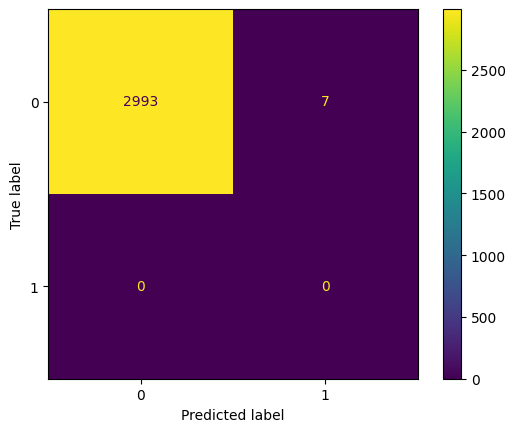

In [36]:
predictions = mlp_model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
Y_test = np.argmax(Y_test.values, axis=1)

confusion_matrix_1 = confusion_matrix(predictions,Y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_1)
disp.plot()

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

**QUESTION** Code below the algorithms allowing to train model


**QUESTION** Plot the confusion matrix and the classification report

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"